In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import plotly.graph_objs as go

In [2]:
# Import data
df_states = pd.read_csv(f'{"full"}/stations_info.csv')
df_states.head()

,file_name,state,city,agency,station_location,start_month,start_month_num,start_year
0,AP001,Andhra Pradesh,Tirupati,APPCB,"Tirumala, Tirupati",July,7,2016
1,AP002,Andhra Pradesh,Vijayawada,APPCB,"PWD Grounds, Vijayawada",May,5,2017
2,AP003,Andhra Pradesh,Visakhapatnam,APPCB,"GVM Corporation, Visakhapatnam",July,7,2017
3,AP004,Andhra Pradesh,Rajamahendravaram,APPCB,"Anand Kala Kshetram, Rajamahendravaram",September,9,2017
4,AP005,Andhra Pradesh,Amaravati,APPCB,"Secretariat, Amaravati",November,11,2017


In [3]:
def get_data_to_city(city_name):
    """
    Retrieve and concatenate data associated with a specific 
    city (city_name parameter).

    This function takes a city name as input and retrieves data 
    files corresponding to that city from a directory named 
    "data_selected". The data files are expected to be in CSV 
    format and should have filenames specified in the 
    'file_name' column of a DataFrame named 'df_states' which 
    was importend in the last section. The function reads these 
    CSV files, appends them to a list of DataFrames, and then 
    concatenates them into a single DataFrame.

    Args:
        city_name (str): The name of the city for which data 
        is to be imported.

    Returns:
        pandas.DataFrame: A DataFrame containing the 
        concatenated data for the specified city.

    Example:
        >>> city_data = get_data_to_city("Bengaluru")
        >>> print(city_data.head())
           Column1  Column2  ...
        0      ...      ...
        1      ...      ...
        ...    ...      ...
    """

    df_list = []
    dfs = df_states.loc[df_states.city == city_name]
    for i in dfs["file_name"]:
      temp_df = pd.read_csv(f'{"data_selected"}/' + i + ".csv")
      df_list.append(temp_df)

    df = pd.concat(df_list)
    return df

In [4]:
df_b = get_data_to_city("Bengaluru")

In [5]:
df_b.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,AT (degree C),THC (),NMHC (ug/m3),NOx (ug/m3),WD (degree),CH4 (),RF (mm),Xylene (ug/m3),CO (ug/m3),RH (W/mt2)
0,2010-01-03 14:00:00,2010-01-03 15:00:00,NaN,NaN,3.14,35.80,38.94,NaN,1.15,1.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-03 15:00:00,2010-01-03 16:00:00,NaN,NaN,3.60,33.53,37.13,NaN,1.34,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03 16:00:00,2010-01-03 17:00:00,NaN,NaN,4.56,35.58,40.14,NaN,1.47,1.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-03 17:00:00,2010-01-03 18:00:00,NaN,NaN,5.12,44.67,49.80,NaN,1.31,1.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-03 18:00:00,2010-01-03 19:00:00,NaN,NaN,14.82,83.80,98.62,NaN,0.59,1.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing values

<Axes: >

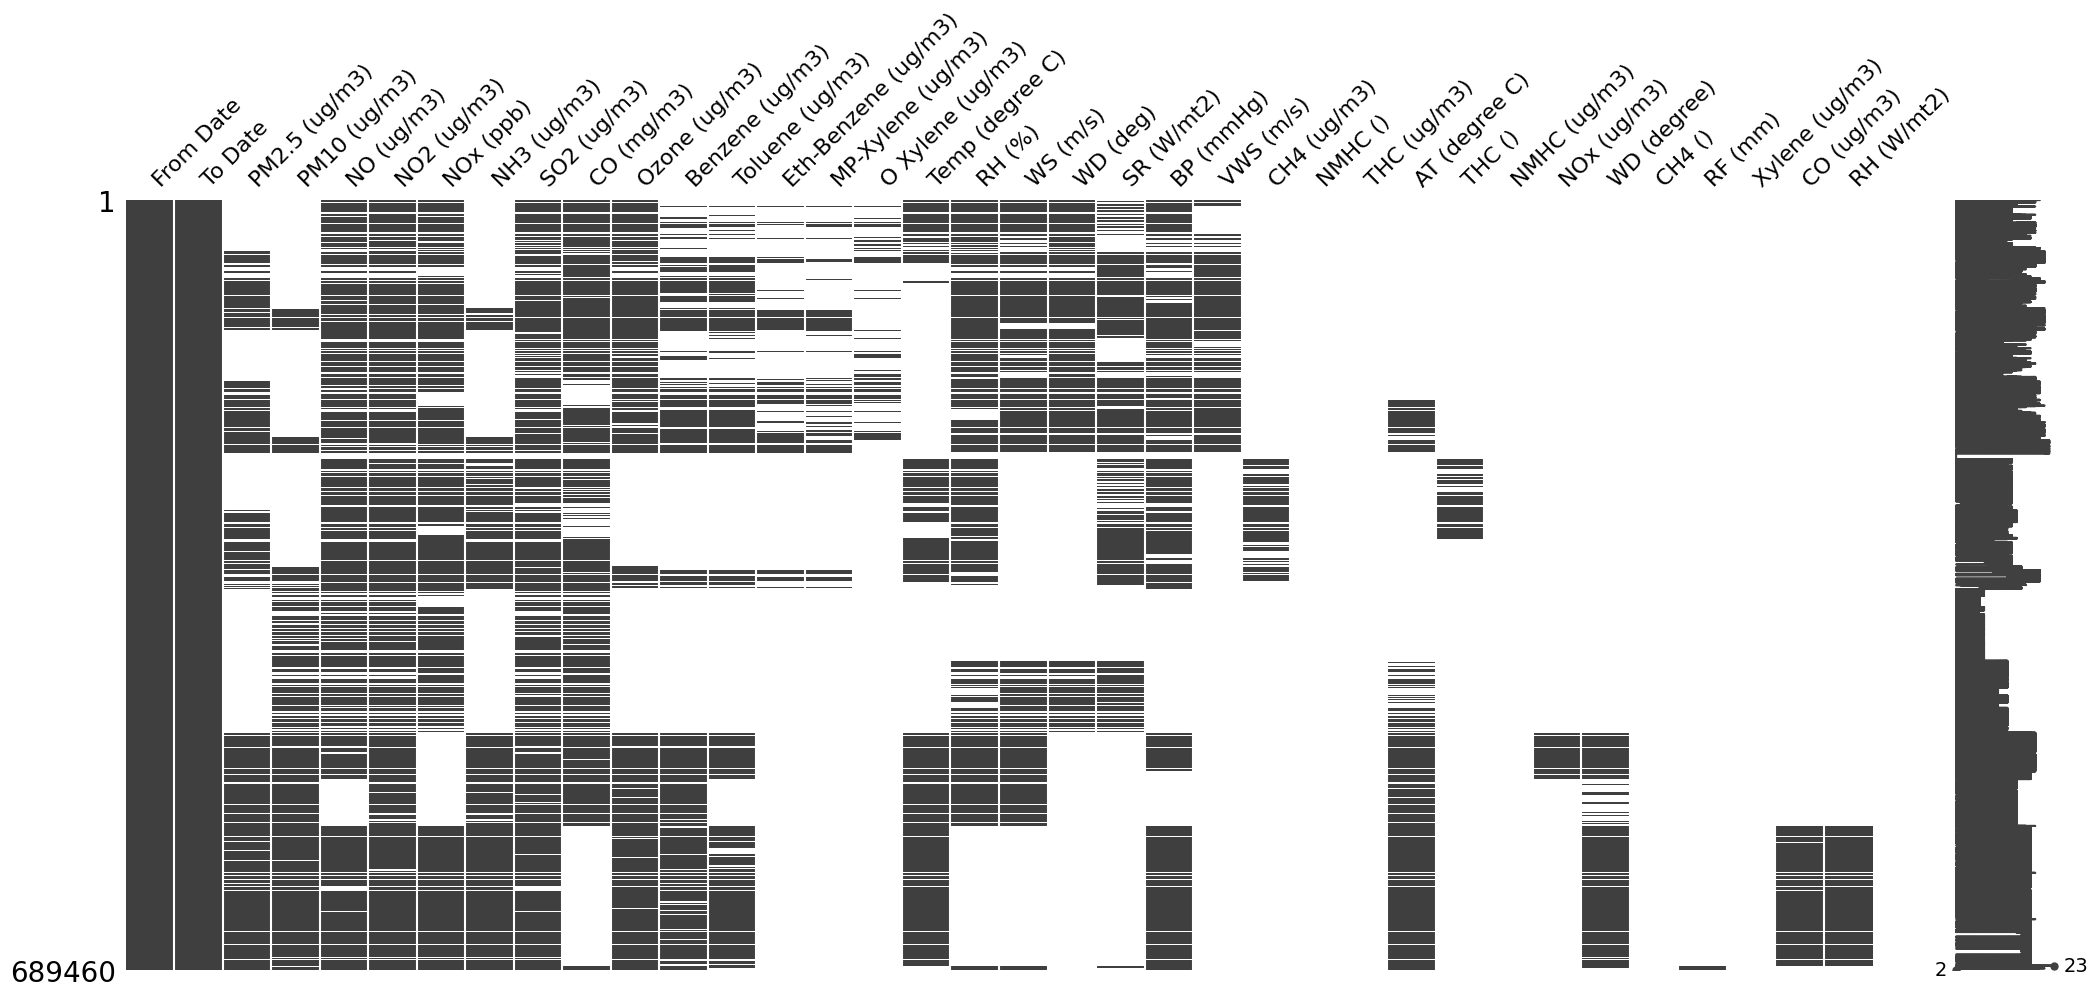

In [6]:
%matplotlib inline
msno.matrix(df_b)

In [7]:
col_name = 'PM2.5 (ug/m3)' # It's an important column and there are missing values

df_b.loc[df_b[col_name].isna()]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,AT (degree C),THC (),NMHC (ug/m3),NOx (ug/m3),WD (degree),CH4 (),RF (mm),Xylene (ug/m3),CO (ug/m3),RH (W/mt2)
0,2010-01-03 14:00:00,2010-01-03 15:00:00,NaN,NaN,3.14,35.80,38.94,NaN,1.15,1.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-03 15:00:00,2010-01-03 16:00:00,NaN,NaN,3.60,33.53,37.13,NaN,1.34,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03 16:00:00,2010-01-03 17:00:00,NaN,NaN,4.56,35.58,40.14,NaN,1.47,1.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-03 17:00:00,2010-01-03 18:00:00,NaN,NaN,5.12,44.67,49.80,NaN,1.31,1.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-03 18:00:00,2010-01-03 19:00:00,NaN,NaN,14.82,83.80,98.62,NaN,0.59,1.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,2023-03-31 06:00:00,2023-03-31 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,2023-03-31 07:00:00,2023-03-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,2023-03-31 08:00:00,2023-03-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1386,2023-03-31 09:00:00,2023-03-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


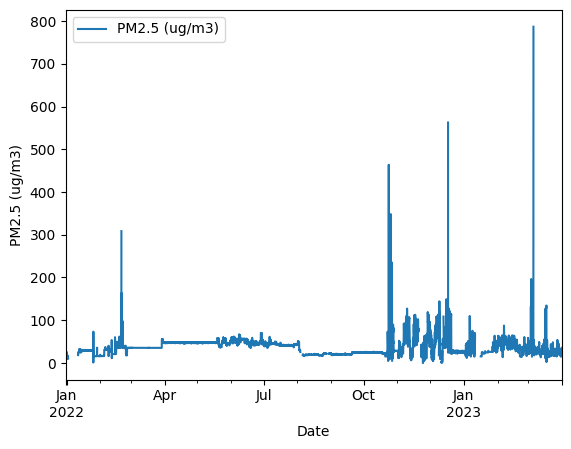

In [8]:
# Ensure datetime index and frequency
df_b = df_b.reset_index(drop=True)
df_b.drop_duplicates(subset='From Date', inplace=True)
df_b.set_index('From Date', inplace=True, drop=False)
df_b.index = pd.to_datetime(df_b.index)  # Convert index to datetime if it's not already

missing_values = df_b.loc[(df_b.index > '2021-12-31')][[col_name, 'From Date']]

# Create the plot
ax = missing_values.plot()

# Add x and y axis titles
ax.set_xlabel("Date")  # Replace "X Axis Title" with your desired x-axis title
ax.set_ylabel("PM2.5 (ug/m3)")  # Replace "Y Axis Title" with your desired y-axis title

# Show the plot
plt.show()

In [9]:
len(missing_values.loc[missing_values[col_name].isna()])

838

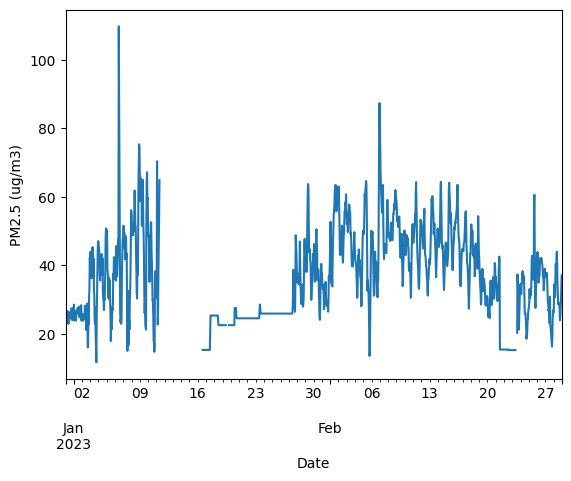

In [10]:
zoomed = df_b.loc[(df_b.index > '2022-12-31') & (df_b.index < '2023-03-01')][col_name]
# Create the plot
ax = zoomed.plot()

# Add x and y axis titles
ax.set_xlabel("Date")  # Replace "X Axis Title" with your desired x-axis title
ax.set_ylabel("PM2.5 (ug/m3)")  # Replace "Y Axis Title" with your desired y-axis title

# Show the plot
plt.show()

## Using a part where there isn't any missing value

In [11]:
mask_from = '2023-02-13'
mask_to = '2023-02-20'

In [12]:
part_without_missing_value = df_b.loc[(df_b.index > mask_from) & 
        (df_b.index < mask_to)][['From Date', col_name]]

In [13]:
part_without_missing_value.loc[part_without_missing_value[col_name].isna()]

,From Date,PM2.5 (ug/m3)
From Date,,


In [14]:
part_before_without_missing_value = df_b.loc[(df_b.index > '2023-01-20') & 
        (df_b.index < mask_from)][['From Date', col_name]]
part_before_without_missing_value.loc[part_before_without_missing_value[col_name].isna()]
# So we can use this part, because more than 3 weeks there isn't any missing value. 
# So we can work with this to impute the masked values.

,From Date,PM2.5 (ug/m3)
From Date,,


In [15]:
part_after_without_missing_value = df_b.loc[(df_b.index >= mask_to) & 
    (df_b.index < '2023-02-22')][['From Date', col_name]]
part_after_without_missing_value.loc[
                    part_after_without_missing_value[col_name].isna()]
# This part is necessary to have a little data without missing values after
# missing data to try out the Backward Fill technique.

,From Date,PM2.5 (ug/m3)
From Date,,


In [16]:
# Masking - create missing values and save the original values
masked_part_without_missing_value = part_without_missing_value.loc[
    (part_without_missing_value.index >= mask_from) & 
    (part_without_missing_value.index < mask_to)].copy()
masked_part_without_missing_value[col_name] = np.nan

In [17]:
masked_part_without_missing_value

,From Date,PM2.5 (ug/m3)
From Date,,
2023-02-13 01:00:00,2023-02-13 01:00:00,NaN
2023-02-13 02:00:00,2023-02-13 02:00:00,NaN
2023-02-13 03:00:00,2023-02-13 03:00:00,NaN
2023-02-13 04:00:00,2023-02-13 04:00:00,NaN
2023-02-13 05:00:00,2023-02-13 05:00:00,NaN
...,...,...
2023-02-19 19:00:00,2023-02-19 19:00:00,NaN
2023-02-19 20:00:00,2023-02-19 20:00:00,NaN
2023-02-19 21:00:00,2023-02-19 21:00:00,NaN


In [18]:
# We create a 'merged' dataframe which includes the dataframe with 
# masked missing values. But not only that. In order to be able 
# use imputation techniques, we need not missing values before and 
# after missing values. 
merged = pd.concat([part_before_without_missing_value, 
    masked_part_without_missing_value, part_after_without_missing_value])

In [19]:
merged

,From Date,PM2.5 (ug/m3)
From Date,,
2023-01-20 01:00:00,2023-01-20 01:00:00,22.47
2023-01-20 02:00:00,2023-01-20 02:00:00,22.48
2023-01-20 03:00:00,2023-01-20 03:00:00,22.46
2023-01-20 04:00:00,2023-01-20 04:00:00,22.46
2023-01-20 05:00:00,2023-01-20 05:00:00,22.48
...,...,...
2023-02-21 19:00:00,2023-02-21 19:00:00,15.34
2023-02-21 20:00:00,2023-02-21 20:00:00,15.34
2023-02-21 21:00:00,2023-02-21 21:00:00,15.34


In [20]:
# Now we do the last step only with the col_name and save it into "original_values"
merged["original_values"] = pd.concat([part_before_without_missing_value[col_name],
    part_without_missing_value[col_name], part_after_without_missing_value[col_name]])

In [21]:
merged

,From Date,PM2.5 (ug/m3),original_values
From Date,,,
2023-01-20 01:00:00,2023-01-20 01:00:00,22.47,22.47
2023-01-20 02:00:00,2023-01-20 02:00:00,22.48,22.48
2023-01-20 03:00:00,2023-01-20 03:00:00,22.46,22.46
2023-01-20 04:00:00,2023-01-20 04:00:00,22.46,22.46
2023-01-20 05:00:00,2023-01-20 05:00:00,22.48,22.48
...,...,...,...
2023-02-21 19:00:00,2023-02-21 19:00:00,15.34,15.34
2023-02-21 20:00:00,2023-02-21 20:00:00,15.34,15.34
2023-02-21 21:00:00,2023-02-21 21:00:00,15.34,15.34


In [22]:
# Forward Fill imputation technique
merged["forward_fill"] = merged[col_name].ffill()

In [23]:
# Backward Fill imputation technique
merged["backward_fill"] = merged[col_name].bfill()

In [24]:
# Linear Interpolation imputation technique
merged["linear"] = merged[col_name].interpolate(option='linear')

In [25]:
merged.loc[(merged.index >= mask_from)].head(10)

,From Date,PM2.5 (ug/m3),original_values,forward_fill,backward_fill,linear
From Date,,,,,,
2023-02-13 01:00:00,2023-02-13 01:00:00,NaN,40.29,39.72,30.19,39.663274
2023-02-13 02:00:00,2023-02-13 02:00:00,NaN,41.75,39.72,30.19,39.606548
2023-02-13 03:00:00,2023-02-13 03:00:00,NaN,45.65,39.72,30.19,39.549821
2023-02-13 04:00:00,2023-02-13 04:00:00,NaN,48.65,39.72,30.19,39.493095
2023-02-13 05:00:00,2023-02-13 05:00:00,NaN,54.04,39.72,30.19,39.436369
2023-02-13 06:00:00,2023-02-13 06:00:00,NaN,59.38,39.72,30.19,39.379643
2023-02-13 07:00:00,2023-02-13 07:00:00,NaN,58.47,39.72,30.19,39.322917
2023-02-13 08:00:00,2023-02-13 08:00:00,NaN,60.17,39.72,30.19,39.266190
2023-02-13 09:00:00,2023-02-13 09:00:00,NaN,59.54,39.72,30.19,39.209464


In [26]:
imputed_df = merged.loc[(merged["From Date"] > mask_from) & (merged["From Date"] <= mask_to)]

In [27]:
imputed_df

,From Date,PM2.5 (ug/m3),original_values,forward_fill,backward_fill,linear
From Date,,,,,,
2023-02-13 01:00:00,2023-02-13 01:00:00,NaN,40.29,39.72,30.19,39.663274
2023-02-13 02:00:00,2023-02-13 02:00:00,NaN,41.75,39.72,30.19,39.606548
2023-02-13 03:00:00,2023-02-13 03:00:00,NaN,45.65,39.72,30.19,39.549821
2023-02-13 04:00:00,2023-02-13 04:00:00,NaN,48.65,39.72,30.19,39.493095
2023-02-13 05:00:00,2023-02-13 05:00:00,NaN,54.04,39.72,30.19,39.436369
...,...,...,...,...,...,...
2023-02-19 19:00:00,2023-02-19 19:00:00,NaN,28.18,39.72,30.19,30.473631
2023-02-19 20:00:00,2023-02-19 20:00:00,NaN,29.84,39.72,30.19,30.416905
2023-02-19 21:00:00,2023-02-19 21:00:00,NaN,30.88,39.72,30.19,30.360179


In [28]:
imputation_column_names = ['original_values', 'linear', 
                        'forward_fill', 'backward_fill']
fig = px.line(imputed_df, x='From Date', y=imputation_column_names)
fig.update_layout(xaxis_title='Date', yaxis_title=col_name, legend_title='Legend')

# Define line styles for each line trace
line_styles = ['solid', 'dash', 'dot', 'dashdot', 'longdash']

# Update the y-axis range
# Find the minimum and maximum values in the specified columns
min_value = imputed_df[imputation_column_names].min().min()
max_value = imputed_df[imputation_column_names].max().max()

# Calculate a margin to prevent values from being at the edges of the plot
margin = (max_value - min_value) * 0.1

# Update the y-axis range with margins
new_y_range = [min_value - margin, max_value + margin]

# Update the y-axis range and set line styles for each line trace
for i, trace_name in enumerate(imputation_column_names):
    fig.update_traces(yaxis='y', selector=dict(name=trace_name), 
            line=dict(dash=line_styles[i]))

# Update the y-axis range
fig.update_yaxes(range=new_y_range)

fig.show()

## Imputing missing values with data of previous days

In [29]:
def get_imputed_df_with_previous_days(merged, day_number):
    """
    Copying the data of a given hour of the previous day 
    to the hour of the missing day. In the case where
    several days are missing, we always copy the data of 
    the last available day. So, for example, if you still 
    have the complete data for Monday, but Tuesday and 
    Wednesday are missing, then for example Tuesday 15:00 
    will be replaced by Monday 15:00. In the same way, 
    the 15:00 data for Wednesday will be the 15:00 data for Monday.

    Args:
        merged (pandas.DataFrame): concated df which include
        not missing values first, then the masked df with missing
        values, then not missing values, like this: 
        [not missing, missing, not missing]
        day_number: maximum days which can be imputed

    Returns:
        pandas.DataFrame: A DataFrame containing imputed data with
        # previous day data

    Example:
    selected_window = get_imputed_df_with_previous_days(merged, 10)
    """
    selected_window = merged.copy()

    # day_number is more than 1, because data is sometimes 
    # missing for more days 
    
    # Function to shift values for different days
    def shift_days(df, col_name, days):
        # Loop through the range of days
        for day in range(1, days+1): 
            # Shift the values in the specified column by 24*day
            df[col_name + f'_day_{day}_before'] = df[col_name].shift(24*day)

        return df
        
    # Call the function with dataframe 'missing_values', column name 'col_name', 
    # and number of weeks 'week_number'
    selected_window = shift_days(selected_window, col_name, day_number)

    # Create a mask for null values in the specified column
    null_mask = selected_window.loc[selected_window[col_name].isnull()].index

    # Function to impute missing values
    def impute_missing_values(df, null_mask, orig_col_name, impute_column):
        # Impute missing values in the original column with values from the 
        # impute column
        df.loc[null_mask, orig_col_name] = df.loc[null_mask, impute_column]
        # Update the mask for null values
        null_mask = df.loc[df[orig_col_name].isnull()].index
        # Return the updated dataframe and the updated mask
        return df, null_mask

    # Generate the name of the new imputed column
    col_name_imputed = f'{col_name}_imputed_prev_days'
    # Copy the original column to the new imputed column
    selected_window[col_name_imputed] = selected_window[col_name].copy()

    # Call the impute function for each day and update the dataframe and the mask
    for offset in range(1, day_number+1):
        imputed_col_name = f'{col_name}_day_{offset}_before'
        selected_window, null_mask = impute_missing_values(selected_window, 
        null_mask, col_name_imputed, imputed_col_name)

    selected_window = selected_window.iloc[day_number:]
    # Plot the imputed column
    selected_window[col_name_imputed].plot()
    print(len(selected_window.loc[selected_window[col_name_imputed].isna()]))
    return selected_window

0


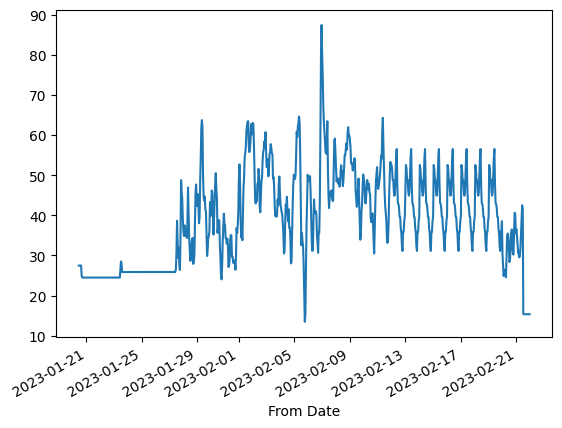

In [30]:
selected_window = get_imputed_df_with_previous_days(merged, 10)

In [31]:
len(merged)

790

In [32]:
col_name_imputed = f'{col_name}_imputed_prev_days'
merged["previous_days"] = selected_window[col_name_imputed].copy()
imputed_df = merged.loc[(merged["From Date"] > mask_from) & 
                        (merged["From Date"] <= mask_to)]

fig = px.line(imputed_df, x='From Date', y=['original_values', 'linear', 
        'forward_fill', 'backward_fill', 'previous_days'], title='Title')
fig.update_layout(xaxis_title='Date', yaxis_title='Values', 
                                        legend_title='Legend')
fig.show()

# Imputing missing values with data of previous same weekday

In [33]:
def get_imputed_df_with_previous_weekdays(merged, week_count, is_mean):
    """
    If is_mean is false:
    Copying the data of a given hour of the previous day 
    to the hour of the missing day. In the case where
    several days are missing, we always copy the data of 
    the last available day. So, for example, if you still 
    have the complete data for Monday, but Tuesday and 
    Wednesday are missing, then for example Tuesday 15:00 
    will be replaced by Monday 15:00. In the same way, 
    the 15:00 data for Wednesday will be the 15:00 data for Monday.
    If is_mean is true: 
    Copy the average of the given hour of the given day of previous 
    weeks (i.e. not just the last one) to the missing place. 
    So if, for example, Tuesday 15:00 is missing, then the average 
    of Tuesday 15:00 of the previous week and Tuesday 15:00 of the 
    week before last week, etc. will be copied.

    Args:
        merged (pandas.DataFrame): concated df which include
        not missing values first, then the masked df with missing
        values, then not missing values, like this: 
        [not missing, missing, not missing]
        day_number (integer): maximum days which can be imputed
        is_mean (boolean): True, if you want to use the average
        of last weekday hours. False, if you want to use only 
        the hour from the last weekday.  

    Returns:
        pandas.DataFrame: A DataFrame containing imputed data with
        # previous day data

    Example:
    selected_window = get_imputed_df_with_previous_days(merged, 10, False)
    """
    
    selected_window = merged.copy()

    # Function to shift values for different days
    def shift_days(df, col_name, weeks):
        # Loop through the range of days
        column_names = []
        for day in range(1*7, (1+weeks)*7, 7): # +7 because we want to get the last same day value
            # Shift the values in the specified column by 24*day
            column_names.append(col_name + f'_day_{day}_before')
            df[column_names[-1]] = df[col_name].shift(24*day-1)
        return df, column_names

    # Call the function with dataframe 'selected_window', 
    # column name 'col_name', and number of weeks 'week_count'
    selected_window, column_names = shift_days(selected_window, col_name, week_count)

    # Create a mask for null values in the specified column
    null_mask = selected_window.loc[selected_window[col_name].isnull()].index

    # Function to impute missing values
    def impute_missing_values(df, null_mask, orig_col_name, impute_column):
        # Impute missing values in the original column with values from 
        # the impute column
        df.loc[null_mask, orig_col_name] = df.loc[null_mask, impute_column]
        # Update the mask for null values
        null_mask = df.loc[df[orig_col_name].isnull()].index
        # Return the updated dataframe and the updated mask
        return df, null_mask

    # Generate the name of the new imputed column
    col_name_imputed = f'{col_name}_imputed_prev_weekdays'
    # Copy the original column to the new imputed column
    selected_window[col_name_imputed] = selected_window[col_name].copy()

    # Call the impute function for each day and update the dataframe and the mask
    if is_mean:
        selected_window["mean_impute"] = selected_window[column_names].mean(axis=1, skipna=True)
        selected_window.loc[null_mask, col_name_imputed] = selected_window.loc[null_mask, "mean_impute"]
    else:
        for offset in range(1*7, week_count*7, 7):
            imputed_col_name = f'{col_name}_day_{offset}_before'
            selected_window, null_mask = impute_missing_values(selected_window, 
                                        null_mask, col_name_imputed, imputed_col_name)

    #selected_window = selected_window.iloc[week_count*7*24:]
    # Plot the imputed column
    selected_window[col_name_imputed].plot()
    print(len(selected_window.loc[selected_window[col_name_imputed].isna()]))
    return selected_window, col_name_imputed

0

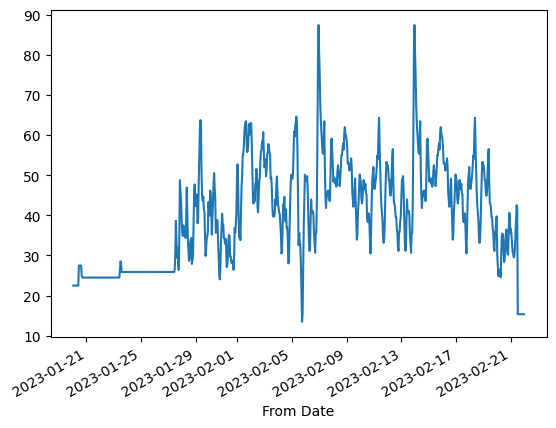

In [34]:
selected_window, col_name_imputed = get_imputed_df_with_previous_weekdays(merged, 3, False)

# Imputing missing values with data of mean of previous same weekday

0


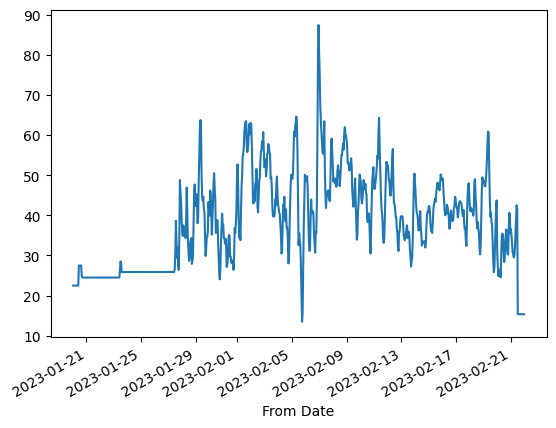

In [35]:
selected_window, col_name_imputed = get_imputed_df_with_previous_weekdays(merged, 3, True)
merged["previous_weekdays"] = selected_window[col_name_imputed]

In [36]:
merged["previous_weekdays_mean"] = selected_window[col_name_imputed].copy()
imputed_df = merged.loc[(merged["From Date"] > mask_from) & 
                        (merged["From Date"] <= mask_to)]

In [37]:
imputed_df

,From Date,PM2.5 (ug/m3),original_values,forward_fill,backward_fill,linear,previous_days,previous_weekdays,previous_weekdays_mean
From Date,,,,,,,,,
2023-02-13 01:00:00,2023-02-13 01:00:00,NaN,40.29,39.72,30.19,39.663274,52.52,39.756667,39.756667
2023-02-13 02:00:00,2023-02-13 02:00:00,NaN,41.75,39.72,30.19,39.606548,51.52,39.683333,39.683333
2023-02-13 03:00:00,2023-02-13 03:00:00,NaN,45.65,39.72,30.19,39.549821,48.80,38.166667,38.166667
2023-02-13 04:00:00,2023-02-13 04:00:00,NaN,48.65,39.72,30.19,39.493095,48.80,35.193333,35.193333
2023-02-13 05:00:00,2023-02-13 05:00:00,NaN,54.04,39.72,30.19,39.436369,45.98,34.253333,34.253333
...,...,...,...,...,...,...,...,...,...
2023-02-19 19:00:00,2023-02-19 19:00:00,NaN,28.18,39.72,30.19,30.473631,32.39,26.963333,26.963333
2023-02-19 20:00:00,2023-02-19 20:00:00,NaN,29.84,39.72,30.19,30.416905,31.11,32.046667,32.046667
2023-02-19 21:00:00,2023-02-19 21:00:00,NaN,30.88,39.72,30.19,30.360179,35.77,36.366667,36.366667


In [38]:
def get_visualisation(given_column_name, imputed_df):
    col_names = ['original_values', given_column_name]
    fig = px.line(imputed_df, x='From Date', y=col_names)
    fig.update_layout(xaxis_title='Date', yaxis_title=col_name, legend_title='')
    # Define line styles for each line trace
    line_styles = ['solid', 'dash']
    # Update the y-axis range and set line styles for each line trace
    for i, trace_name in enumerate(col_names):
        fig.update_traces(yaxis='y', selector=dict(name=trace_name), 
                                    line=dict(dash=line_styles[i]))

    # Calculate a margin to prevent values from being at the edges of the plot
    margin = (max_value - min_value) * 0.25

    # Update the y-axis range with margins
    new_y_range = [min_value - margin, max_value + margin]

    # Update the y-axis range and set line styles for each line trace
    for i, trace_name in enumerate(col_names):
        fig.update_traces(yaxis='y', selector=dict(name=trace_name), 
                                    line=dict(dash=line_styles[i]))

    # Update the y-axis range
    fig.update_yaxes(range=new_y_range)
    fig.update_layout(
        legend=dict(
            x=1,         
            y=1,           
            xanchor='right',  
            yanchor='top'    
        )
    )
    fig.show()

In [39]:
imputed_df = merged.loc[(merged["From Date"] > mask_from) & 
                        (merged["From Date"] <= mask_to)]
# Assuming you have imported your dataframe as 'imputed_df'

get_visualisation('previous_days', imputed_df)

In [40]:
get_visualisation('previous_weekdays', imputed_df)

In [41]:
get_visualisation('previous_weekdays_mean', imputed_df)

In [44]:
mae_scores = {
    'Forward Fill': round(np.abs(imputed_df["original_values"] - 
                            imputed_df["forward_fill"]).mean(), 2),
    'Backward Fill': round(np.abs(imputed_df["original_values"] - 
                            imputed_df["backward_fill"]).mean(), 2),
    'Linear Interpolation': round(np.abs(imputed_df["original_values"] - 
                                    imputed_df["linear"]).mean(), 2),
    'Previous Day': round(np.abs(imputed_df["original_values"] - 
                            imputed_df["previous_days"]).mean(), 2),
    'Previous Weekday': round(np.abs(imputed_df["original_values"] - 
                        imputed_df["previous_weekdays"]).mean(), 2),
    'Mean of Previous Weekdays': round(np.abs(imputed_df["original_values"] - 
                            imputed_df["previous_weekdays_mean"]).mean(), 2),

}

keys = list(mae_scores.keys())
values = list(mae_scores.values())

fig = go.Figure(data=[go.Table(
    header=dict(values=['Method', 'MAE']),
    cells=dict(values=[keys, values]))
])

fig.show()

# Handling Seasonality and Trends in Time Series

In [45]:
col_name_imputed = '_'.join([col_name, 'imputed_prev_days'])

0


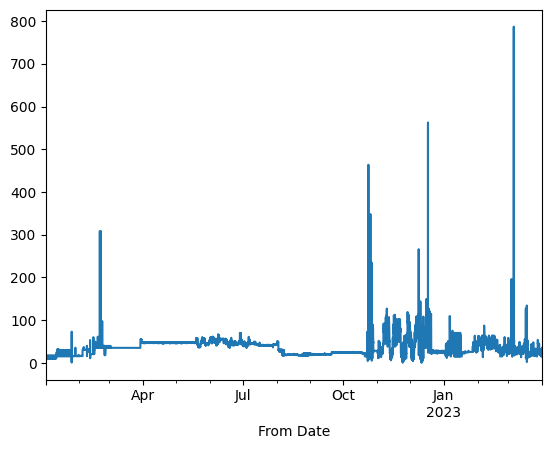

In [46]:
missing_values = get_imputed_df_with_previous_days(missing_values, 50)

In [47]:
# Check if there is still any missing values 
missing_values.loc[missing_values[col_name_imputed].isna()]

,PM2.5 (ug/m3),From Date,PM2.5 (ug/m3)_day_1_before,PM2.5 (ug/m3)_day_2_before,PM2.5 (ug/m3)_day_3_before,PM2.5 (ug/m3)_day_4_before,PM2.5 (ug/m3)_day_5_before,PM2.5 (ug/m3)_day_6_before,PM2.5 (ug/m3)_day_7_before,PM2.5 (ug/m3)_day_8_before,...,PM2.5 (ug/m3)_day_42_before,PM2.5 (ug/m3)_day_43_before,PM2.5 (ug/m3)_day_44_before,PM2.5 (ug/m3)_day_45_before,PM2.5 (ug/m3)_day_46_before,PM2.5 (ug/m3)_day_47_before,PM2.5 (ug/m3)_day_48_before,PM2.5 (ug/m3)_day_49_before,PM2.5 (ug/m3)_day_50_before,PM2.5 (ug/m3)_imputed_prev_days
From Date,,,,,,,,,,,,,,,,,,,,,


In [48]:
imputed_df

,From Date,PM2.5 (ug/m3),original_values,forward_fill,backward_fill,linear,previous_days,previous_weekdays,previous_weekdays_mean
From Date,,,,,,,,,
2023-02-13 01:00:00,2023-02-13 01:00:00,NaN,40.29,39.72,30.19,39.663274,52.52,39.756667,39.756667
2023-02-13 02:00:00,2023-02-13 02:00:00,NaN,41.75,39.72,30.19,39.606548,51.52,39.683333,39.683333
2023-02-13 03:00:00,2023-02-13 03:00:00,NaN,45.65,39.72,30.19,39.549821,48.80,38.166667,38.166667
2023-02-13 04:00:00,2023-02-13 04:00:00,NaN,48.65,39.72,30.19,39.493095,48.80,35.193333,35.193333
2023-02-13 05:00:00,2023-02-13 05:00:00,NaN,54.04,39.72,30.19,39.436369,45.98,34.253333,34.253333
...,...,...,...,...,...,...,...,...,...
2023-02-19 19:00:00,2023-02-19 19:00:00,NaN,28.18,39.72,30.19,30.473631,32.39,26.963333,26.963333
2023-02-19 20:00:00,2023-02-19 20:00:00,NaN,29.84,39.72,30.19,30.416905,31.11,32.046667,32.046667
2023-02-19 21:00:00,2023-02-19 21:00:00,NaN,30.88,39.72,30.19,30.360179,35.77,36.366667,36.366667


In [49]:
def get_seasonal_visualization(df, col_name):
    # Perform time series decomposition
    result = seasonal_decompose(df[col_name], model='additive')

    # Plot the components
    plt.figure(figsize=(8, 6))

    plt.subplot(4, 1, 1)
    plt.plot(result.trend)
    plt.title('Trend')

    plt.subplot(4, 1, 2)
    plt.plot(result.seasonal)
    plt.title('Seasonal')

    plt.subplot(4, 1, 3)
    plt.plot(result.resid)
    plt.title('Irregular')

    plt.subplot(4, 1, 4)
    plt.plot(result.observed)
    plt.title('Original')

    plt.tight_layout()
    plt.show()

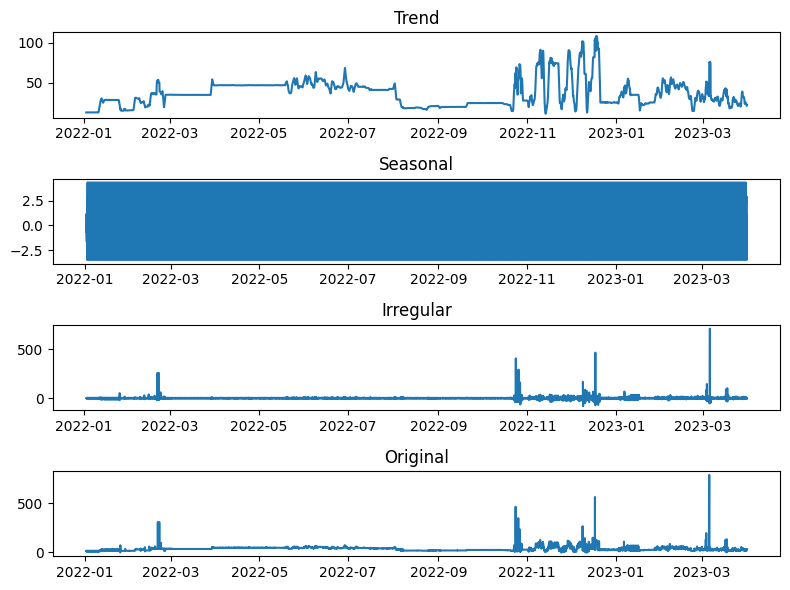

In [50]:
# Set frequency to daily
imputed_df = imputed_df.asfreq('D')
get_seasonal_visualization(missing_values, col_name_imputed)

In [51]:
imputed_df

,From Date,PM2.5 (ug/m3),original_values,forward_fill,backward_fill,linear,previous_days,previous_weekdays,previous_weekdays_mean
From Date,,,,,,,,,
2023-02-13 01:00:00,2023-02-13 01:00:00,NaN,40.29,39.72,30.19,39.663274,52.52,39.756667,39.756667
2023-02-14 01:00:00,2023-02-14 01:00:00,NaN,47.40,39.72,30.19,38.301845,52.52,45.010000,45.010000
2023-02-15 01:00:00,2023-02-15 01:00:00,NaN,42.62,39.72,30.19,36.940417,52.52,42.310000,42.310000
2023-02-16 01:00:00,2023-02-16 01:00:00,NaN,50.48,39.72,30.19,35.578988,52.52,48.536667,48.536667
2023-02-17 01:00:00,2023-02-17 01:00:00,NaN,44.45,39.72,30.19,34.217560,52.52,42.116667,42.116667
2023-02-18 01:00:00,2023-02-18 01:00:00,NaN,51.91,39.72,30.19,32.856131,52.52,41.026667,41.026667
2023-02-19 01:00:00,2023-02-19 01:00:00,NaN,38.29,39.72,30.19,31.494702,52.52,48.606667,48.606667


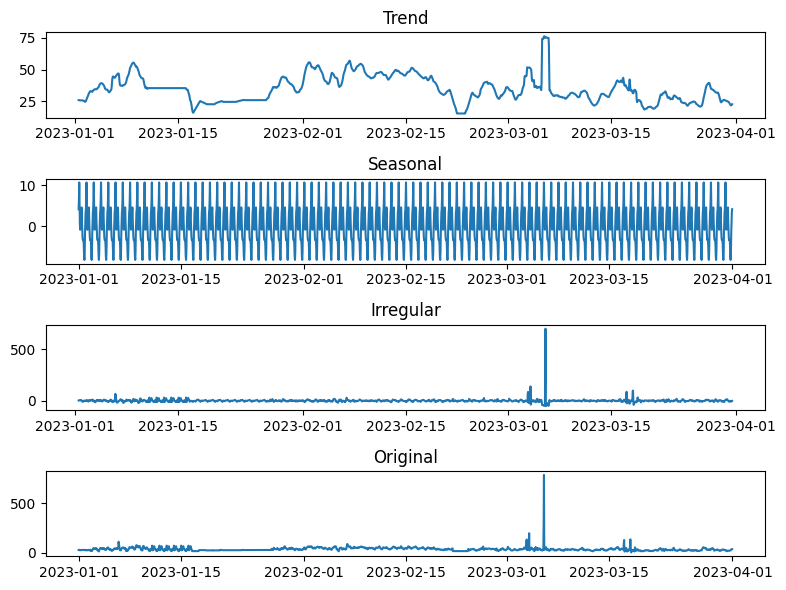

In [52]:
# Last 3 months
last_3_months = missing_values.loc[(missing_values.index >= (missing_values.index[-1] - pd.DateOffset(months=3)))]

# Perform time series decomposition
get_seasonal_visualization(last_3_months, col_name_imputed)

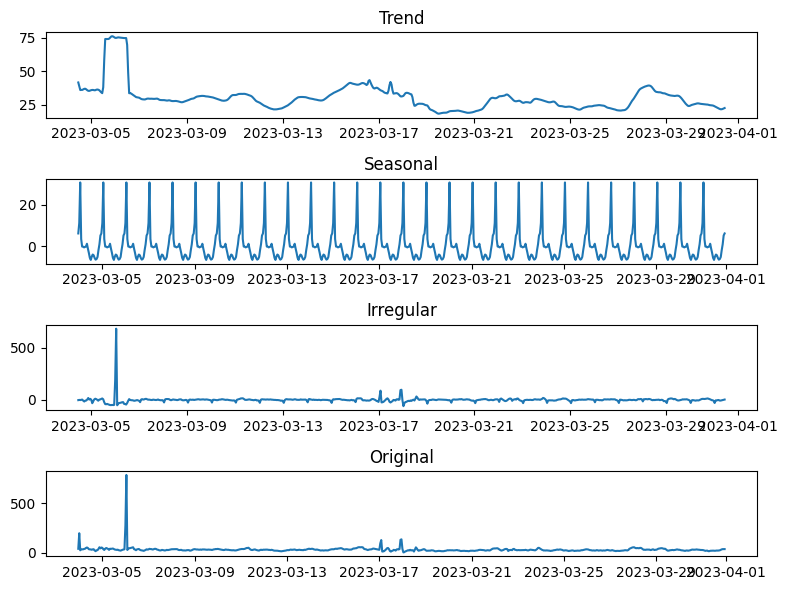

In [53]:
last_1_month = missing_values.loc[(missing_values.index >= (missing_values.index[-1] - 
                                    pd.DateOffset(weeks=4)))]

# Perform time series decomposition
get_seasonal_visualization(last_1_month, col_name_imputed)

# With MSTL

In [54]:
register_matplotlib_converters()
sns.set_style("darkgrid")

In [55]:
last_1_month = missing_values.loc[(missing_values.index >= 
                (missing_values.index[-1] - pd.DateOffset(weeks=4)))]

last_1_month.loc[last_1_month[col_name] > 100] = np.NaN

In [56]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)
last_1_month = missing_values.loc[(missing_values.index >= 
            (missing_values.index[-1] - pd.DateOffset(weeks=4)))]

last_1_month.loc[last_1_month[col_name_imputed] > 100] = np.NaN
last_1_month[col_name_imputed] = last_1_month[col_name_imputed].ffill()
mstl = MSTL(last_1_month[col_name_imputed], periods=[24, 24 * 7])
res = mstl.fit()

/var/folders/61/cz17lqfd00q9x1d3cz8dd5wh0000gn/T/ipykernel_7842/3188272445.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



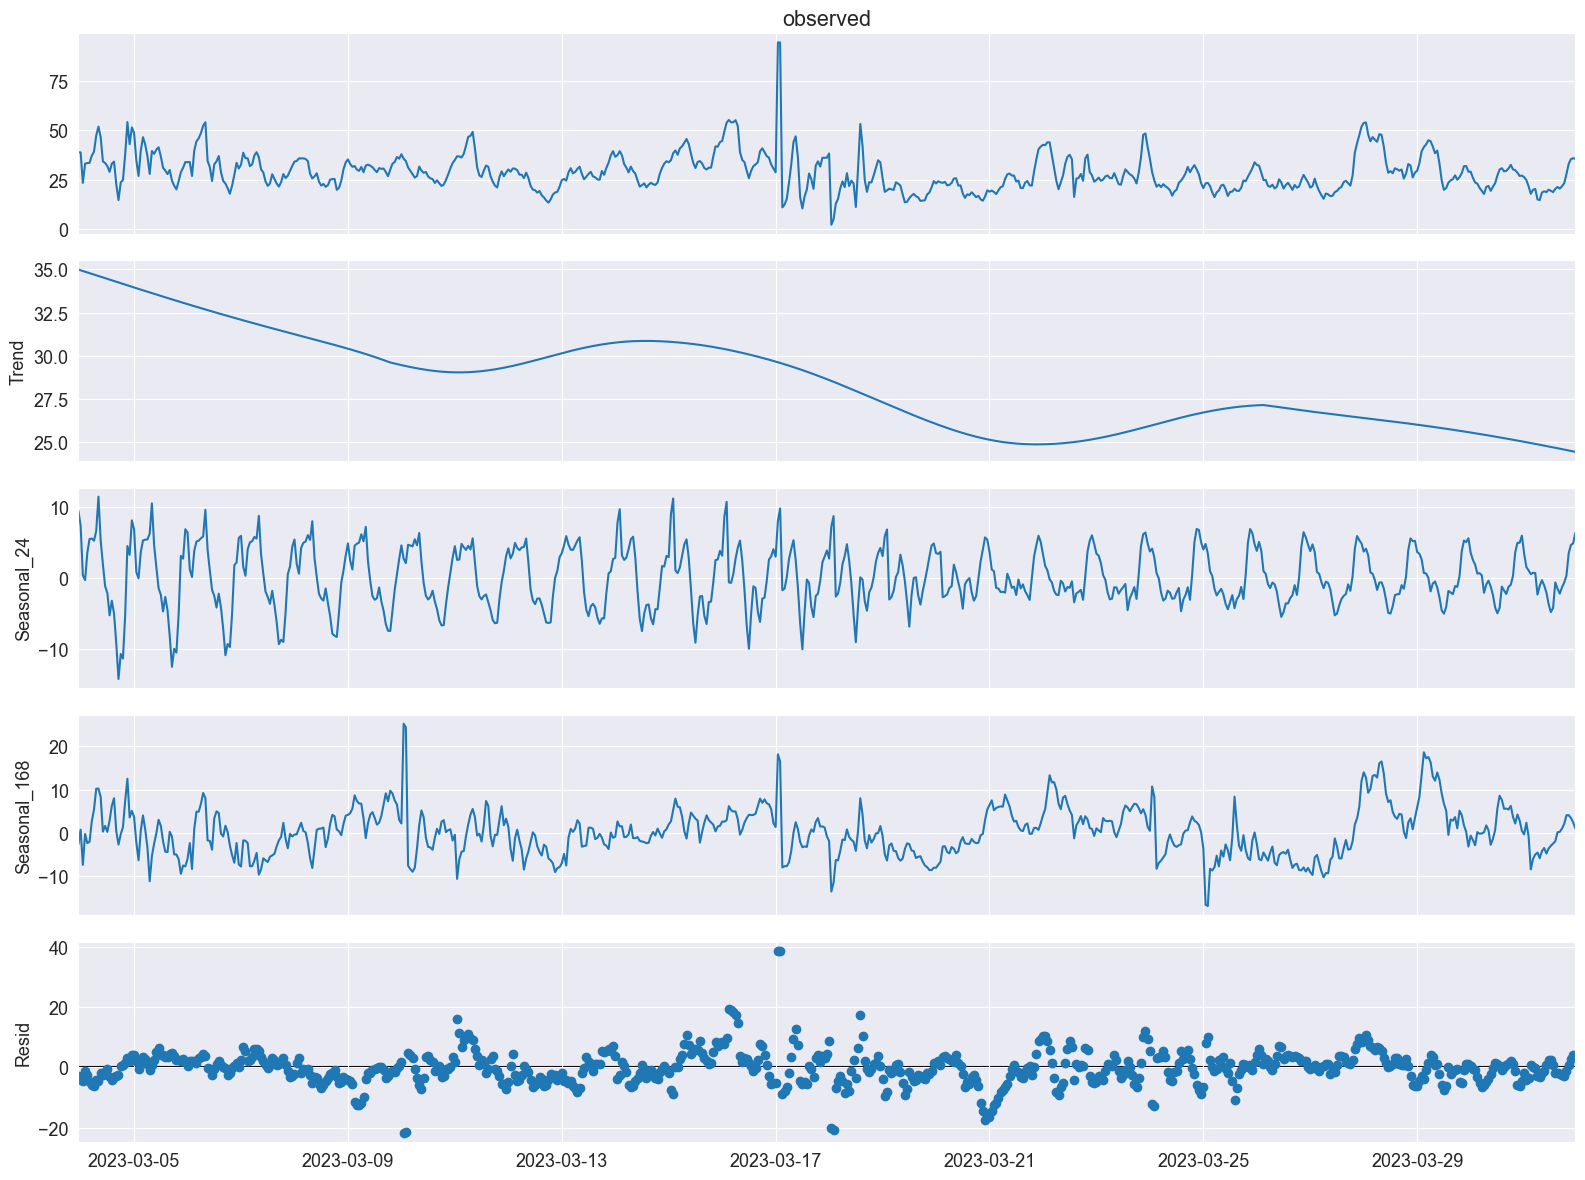

In [57]:
ax = res.plot()

In [58]:
# Group data by weekday
last_3_months['weekday'] = last_3_months.index.weekday

# Generate boxplots for each weekday
fig = px.box(last_3_months, x='weekday', y=col_name_imputed)

fig.show()

/var/folders/61/cz17lqfd00q9x1d3cz8dd5wh0000gn/T/ipykernel_7842/469690524.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
# Group the data by weekday and calculate the mean for each weekday
df_weekday_mean = last_3_months[col_name_imputed].groupby(
                            last_3_months.index.weekday).mean()

In [60]:
df_weekday_mean

From Date
0    36.312853
1    32.886378
2    34.934647
3    33.946346
4    35.573141
5    35.243945
6    33.735705
Name: PM2.5 (ug/m3)_imputed_prev_days, dtype: float64

In [61]:
missing_values[col_name_imputed].sort_index(inplace=True)

# Decomposition of time series

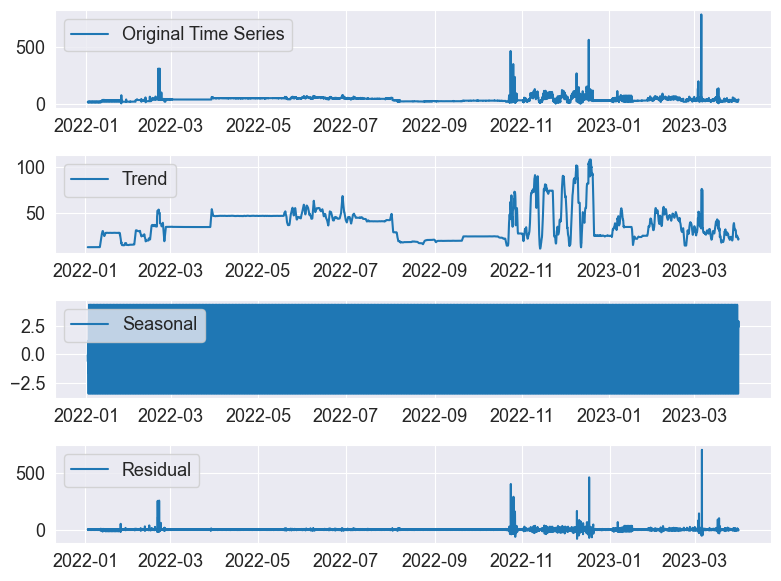

In [62]:

# Perform time series decomposition
result = seasonal_decompose(missing_values[col_name_imputed], 
                                            model='additive')


# Plot the components
plt.figure(figsize=(8, 6))

plt.subplot(4, 1, 1)
plt.plot(missing_values[col_name_imputed], 
                                label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
result.trend

From Date
2022-01-02 03:00:00   NaN
2022-01-02 04:00:00   NaN
2022-01-02 05:00:00   NaN
2022-01-02 06:00:00   NaN
2022-01-02 07:00:00   NaN
                       ..
2023-03-31 19:00:00   NaN
2023-03-31 20:00:00   NaN
2023-03-31 21:00:00   NaN
2023-03-31 22:00:00   NaN
2023-03-31 23:00:00   NaN
Name: trend, Length: 10893, dtype: float64

In [64]:
lowess_smoothed_array = lowess(missing_values[col_name_imputed], 
            np.arange(len(missing_values[col_name_imputed])), frac=0.1)[:, 1] 
# https://stats.stackexchange.com/questions/161069/difference-between-loess-and-lowess

In [65]:
lowess_smoothed = pd.DataFrame()
lowess_smoothed["Trend"] = lowess_smoothed_array
lowess_smoothed.index = missing_values.index

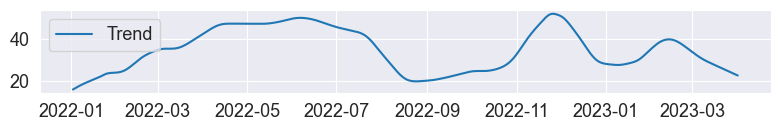

In [66]:
plt.figure(figsize=(8, 1.5))
plt.plot(lowess_smoothed["Trend"], label='Trend')
plt.legend()

plt.tight_layout()

plt.show()

# Autocorrelation

In [67]:
missing_values[col_name_imputed]

From Date
2022-01-02 03:00:00    12.28
2022-01-02 04:00:00    11.24
2022-01-02 05:00:00    12.63
2022-01-02 06:00:00    11.94
2022-01-02 07:00:00    10.21
                       ...  
2023-03-31 19:00:00    27.75
2023-03-31 20:00:00    32.92
2023-03-31 21:00:00    35.34
2023-03-31 22:00:00    35.82
2023-03-31 23:00:00    35.48
Name: PM2.5 (ug/m3)_imputed_prev_days, Length: 10893, dtype: float64

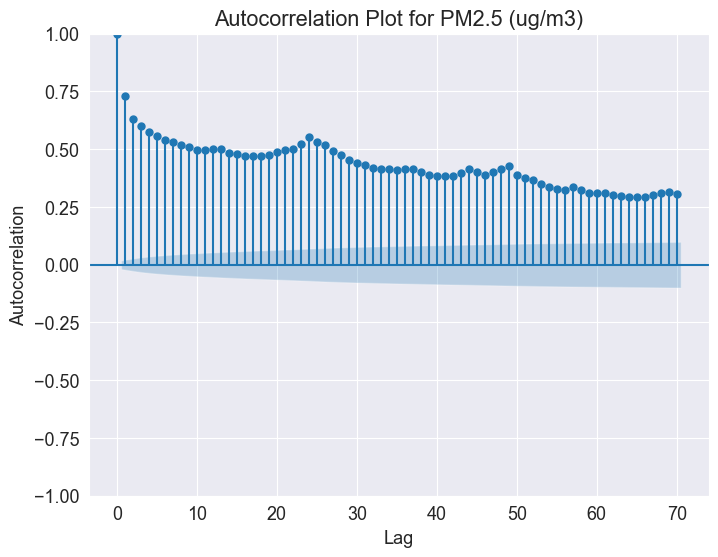

In [68]:

# Plot the autocorrelation function
fig, ax = plt.subplots(figsize=(8, 6))
plot_acf(missing_values[col_name_imputed].dropna(), lags=70, ax=ax)
plt.title(f'Autocorrelation Plot for {col_name}')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

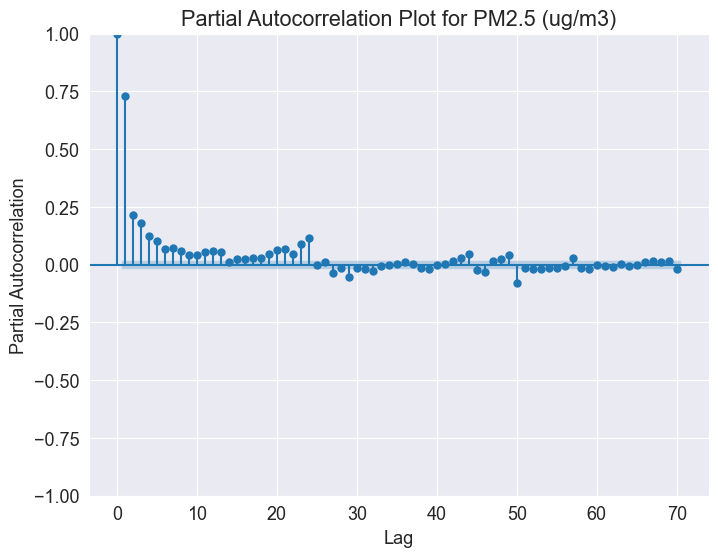

In [69]:

fig, ax = plt.subplots(figsize=(8, 6))
plot_pacf(missing_values[col_name_imputed].dropna(), lags=70, ax=ax)
plt.title(f'Partial Autocorrelation Plot for {col_name}')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()
